<a href="https://colab.research.google.com/github/youssef893/Detect_hand_written_Digits/blob/main/cnn_model_for_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from sklearn.utils import shuffle
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from mlxtend.data import loadlocal_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
# x_train, y_train, x_valid, y_valid = train_test_split(x_train, y_train)

In [4]:
cnn = Sequential()
# first conv layer
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
# second layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))  # filters is number of filters & kernel size is size of filter
# max pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer
cnn.add(Flatten())
# Fully connected layer
cnn.add(Dense(512, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

In [5]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(x_train, to_categorical(y_train), epochs=15, batch_size=128,
        validation_data=(x_test, to_categorical(y_test)))
cnn.save("cnn.h5")

Epoch 1/15
469/469 [==============================] - 19s 15ms/step - loss: 0.3617 - accuracy: 0.9164 - val_loss: 0.0331 - val_accuracy: 0.9902
Epoch 2/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0370 - val_accuracy: 0.9874
Epoch 3/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0217 - val_accuracy: 0.9933
Epoch 4/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0337 - val_accuracy: 0.9908
Epoch 5/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0275 - val_accuracy: 0.9910
Epoch 6/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0283 - val_accuracy: 0.9918
Epoch 7/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0328 - val_accuracy: 0.991

In [6]:
prediction = cnn.predict(x_test)
score = cnn.evaluate(x_test, to_categorical(y_test), verbose=0)
print("accuracy CNN", score[1])
prediction = np.argmax(prediction, axis=1)

accuracy CNN 0.9926999807357788


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(prediction, y_test)

In [17]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       983
           1       1.00      0.99      1.00      1140
           2       0.99      1.00      0.99      1019
           3       1.00      0.99      0.99      1020
           4       0.99      0.99      0.99       985
           5       0.99      0.99      0.99       890
           6       0.99      0.99      0.99       953
           7       0.99      0.99      0.99      1034
           8       0.99      1.00      0.99       969
           9       0.99      0.99      0.99      1007

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

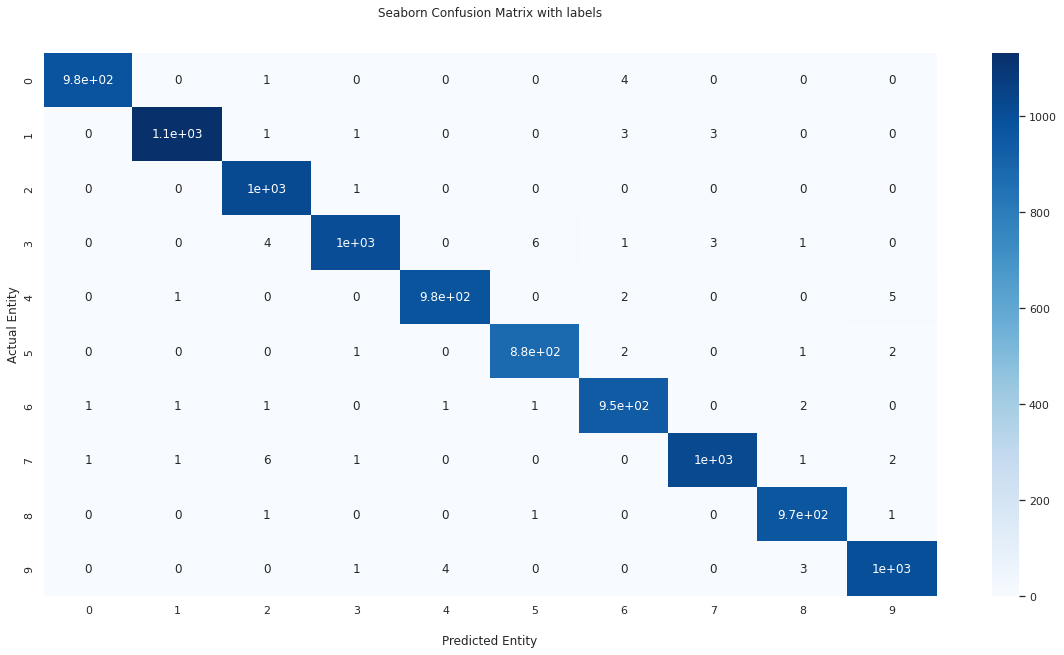

In [13]:
sns.set(rc = {'figure.figsize':(20, 10)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title(f'Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Entity')
ax.set_ylabel('Actual Entity')
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
ax.yaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])